Here we apply the best subset selection approach to the Hitters data. We
wish to predict a baseball player’s Salary on the basis of various statistics
associated with performance in the previous year.

Now we will download the dataset

In [96]:
# conventional way to import pandas
import pandas as pd
# conventional way to import seaborn
import seaborn as sns
# conventional way to import numpy
import numpy as np

from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Hitters.csv")

data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


After listing the data we can see that some have missing data for their Salary. Next drop all the rows that contain NaN data.

In [97]:
data = data.dropna()
data.head()


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


Now we performs best Best Subset Selection by identifying the best model that contains a given number
of predictors, where best is quantified using RSS.

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from patsy import dmatrices

#TODO ADD THE LAST predictors!!!!


#y, X = dmatrices('Salary~AtBat+Hits+HmRun+Runs+RBI+Walks+Years+CAtBat+CHits+CHmRun', data, return_type = 'matrix')

X = data.iloc[:,1:12]
y = data.iloc[:,19]

print(X.shape)
print(y.shape)

selector = SelectKBest(chi2, k='all').fit(X,y)
x_new = selector.transform(X) # not needed to get the score
scores = selector.scores_

#fitMeAlready = SelectKBest(f_classif, k=2)
#fitMeAlready.fit_transform(X, y)
#x = fitMeAlready.fit(X,y)


(263, 11)
(263,)


ValueError: Unknown label type: (array([  475.   ,   480.   ,   500.   ,    91.5  ,   750.   ,    70.   ,
         100.   ,    75.   ,  1100.   ,   517.143,   512.5  ,   550.   ,
         700.   ,   240.   ,   775.   ,   175.   ,   135.   ,   100.   ,
         115.   ,   600.   ,   776.667,   765.   ,   708.333,   750.   ,
         625.   ,   900.   ,   110.   ,   612.5  ,   300.   ,   850.   ,
          90.   ,    67.5  ,   180.   ,   305.   ,   215.   ,   247.5  ,
         815.   ,   875.   ,    70.   ,  1200.   ,   675.   ,   415.   ,
         340.   ,   416.667,  1350.   ,    90.   ,   275.   ,   230.   ,
         225.   ,   950.   ,    75.   ,   105.   ,   320.   ,   850.   ,
         535.   ,   933.333,   850.   ,   210.   ,   325.   ,   275.   ,
         450.   ,  1975.   ,  1900.   ,   600.   ,  1041.667,   110.   ,
         260.   ,   475.   ,   431.5  ,  1220.   ,    70.   ,   145.   ,
         595.   ,  1861.46 ,   300.   ,   490.   ,  2460.   ,   375.   ,
         750.   ,  1175.   ,    70.   ,  1500.   ,   385.   ,  1925.571,
         215.   ,   900.   ,   155.   ,   700.   ,   535.   ,   362.5  ,
         733.333,   200.   ,   400.   ,   400.   ,   737.5  ,   500.   ,
         600.   ,   662.5  ,   950.   ,   750.   ,   297.5  ,   325.   ,
          87.5  ,   175.   ,    90.   ,  1237.5  ,   430.   ,   100.   ,
         165.   ,   250.   ,  1300.   ,   773.333,  1008.333,   275.   ,
         775.   ,   850.   ,   365.   ,    95.   ,   110.   ,   100.   ,
         277.5  ,    80.   ,   600.   ,   200.   ,   657.   ,    75.   ,
        2412.5  ,   250.   ,   155.   ,   640.   ,   300.   ,   110.   ,
         825.   ,   195.   ,   450.   ,   630.   ,    86.5  ,  1300.   ,
        1000.   ,  1800.   ,  1310.   ,   737.5  ,   625.   ,   125.   ,
        1043.333,   725.   ,   300.   ,   365.   ,    75.   ,  1183.333,
         202.5  ,   225.   ,   525.   ,   265.   ,   787.5  ,   800.   ,
         587.5  ,   145.   ,   420.   ,    75.   ,   575.   ,   780.   ,
          90.   ,   150.   ,   700.   ,   550.   ,   650.   ,    68.   ,
         100.   ,   670.   ,   175.   ,   137.   ,  2127.333,   875.   ,
         120.   ,   140.   ,   210.   ,   800.   ,   240.   ,   350.   ,
         175.   ,   200.   ,  1940.   ,   700.   ,   750.   ,   450.   ,
         172.   ,  1260.   ,   750.   ,   190.   ,   580.   ,   130.   ,
         450.   ,   300.   ,   250.   ,  1050.   ,   215.   ,   400.   ,
         560.   ,  1670.   ,   487.5  ,   425.   ,   500.   ,   250.   ,
         400.   ,   450.   ,   750.   ,    70.   ,   875.   ,   190.   ,
         191.   ,   740.   ,   250.   ,   140.   ,    97.5  ,   740.   ,
         140.   ,   341.667,  1000.   ,   100.   ,    90.   ,   200.   ,
         135.   ,   155.   ,   475.   ,  1450.   ,   150.   ,   105.   ,
         350.   ,    90.   ,   530.   ,   341.667,   940.   ,   350.   ,
         326.667,   250.   ,   740.   ,   425.   ,   925.   ,   185.   ,
         920.   ,   286.667,   245.   ,   235.   ,  1150.   ,   160.   ,
         425.   ,   900.   ,   500.   ,   277.5  ,   750.   ,   160.   ,
        1300.   ,   525.   ,   550.   ,  1600.   ,   120.   ,   165.   ,
         700.   ,   875.   ,   385.   ,   960.   ,  1000.   ]),)

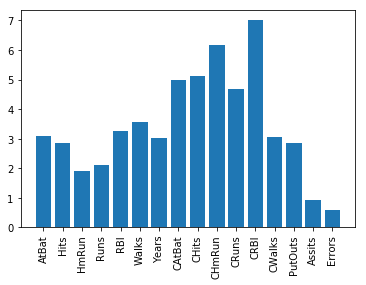

In [103]:
from sklearn.feature_selection import SelectPercentile, f_classif

df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Hitters.csv').dropna()
 
#split data
X = df.iloc[:,1:19].drop('League', 1).drop('Division', 1) # our independent variable
y = df["Salary"] # our dependent variable
 
selector = SelectKBest(f_classif, k=8)
selector.fit(X, y)
 
#get the p values for each feature
scores = -np.log10(selector.pvalues_)
 
predictors = ["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks",
             "Years", "CAtBat", "CHits", "CHmRun", "CRuns",
             "CRBI", "CWalks", "PutOuts", "Assits", "Errors"]
 
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()